# **Exploratory Data Analysis for World Bank API data**
This notebook outlines the steps taken to perform an EDA on the World Bank API data. The World Bank Indicators API provides access to nearly 16,000 time series indicators. Most of these indicators are available online through tools such as Databank and the Open Data website. The API provides programmatic access to this same data.

Of this large number of indicators, 10 were chosen thinking that they could be useful for a future analysis of the data we have on leukemia.

To begin, the necessary libraries are imported to ensure the correct functioning of the code.

In [2]:
import pandas as pd
import os
import json
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### ***Extracting needed countries***

Taking into account that in the dataset related to leukemia we have data distributed around only 22 countries the first thing that will be done to work with the API data will be to filter the countries it contains so that it has exactly the same 22 countries of the Dataset of leukemia

The working directory is changed so that the system can locate the credentials json and api dataset.

In [3]:
os.chdir("..")
print(os.getcwd())

/home/v4lentin4/Leukemia-Cancer-Risk-ETL


The credentials are read and extracted to establish a connection to PostgreSQL. Then, the connection to the leukemia database stored in PostgreSQL is established.

In [4]:
with open("credentials.json") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]
db_port = credentials["db_port"]  

conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port  )

🗺️ Now, we run a query to extract the countries stored in the leukemia data given that those are the ones that we are gonna need from the api dataset

In [11]:
cursor = conn.cursor()
query = 'SELECT DISTINCT(country) FROM leukemia_clean_data;'
cursor.execute(query)

needed_countries = [row[0] for row in cursor.fetchall()]

print(needed_countries)


['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Norway', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Turkey', 'UK', 'USA']


They get standarized into lowercase to avoid problems filtering the api dataset

In [12]:
needed_countries = [x.lower() for x in needed_countries]
print(needed_countries)

['argentina', 'australia', 'brazil', 'canada', 'china', 'france', 'germany', 'india', 'italy', 'japan', 'mexico', 'netherlands', 'norway', 'russia', 'saudi arabia', 'south africa', 'south korea', 'spain', 'sweden', 'turkey', 'uk', 'usa']


Now, we read the csv extracted from the API

In [13]:
df = pd.read_csv("data/world_bank_data.csv")
df

,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
0,Afghanistan,2000,0.050476,NaN,65.651597,100.000000,174.930991,64.767280,NaN,NaN,NaN,NaN,0.003
1,Afghanistan,2001,0.046573,NaN,65.025449,100.000000,138.706822,64.597573,NaN,NaN,NaN,46.0,0.003
2,Afghanistan,2002,0.044078,NaN,64.186689,104.751559,178.954088,64.416888,NaN,NaN,NaN,43.7,0.007
3,Afghanistan,2003,0.044341,NaN,63.481557,166.822535,198.871116,64.176231,NaN,NaN,NaN,38.6,0.016
4,Afghanistan,2004,0.037898,NaN,62.469948,170.466492,221.763654,63.826609,NaN,NaN,NaN,35.9,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,Zimbabwe,2019,0.731382,NaN,62.397972,623.474178,1684.027904,18.528607,NaN,38.3,69.8,39.4,3.630
5171,Zimbabwe,2020,0.584283,NaN,58.741384,212.474438,1730.413489,19.494180,21.56821,NaN,73.0,39.5,2.670
5172,Zimbabwe,2021,0.672480,NaN,53.622533,212.474438,1724.387731,NaN,NaN,NaN,73.6,38.9,NaN
5173,Zimbabwe,2022,0.682243,NaN,53.323843,212.474438,2040.552459,NaN,NaN,NaN,70.7,38.1,NaN


#### Filtering countries

After reading the API data and loading it into a DataFrame we realized that the values in the country column were not in lowercase, so we standarized it.

In [14]:
df["Country"] = df["Country"].str.lower()
df

,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
0,afghanistan,2000,0.050476,NaN,65.651597,100.000000,174.930991,64.767280,NaN,NaN,NaN,NaN,0.003
1,afghanistan,2001,0.046573,NaN,65.025449,100.000000,138.706822,64.597573,NaN,NaN,NaN,46.0,0.003
2,afghanistan,2002,0.044078,NaN,64.186689,104.751559,178.954088,64.416888,NaN,NaN,NaN,43.7,0.007
3,afghanistan,2003,0.044341,NaN,63.481557,166.822535,198.871116,64.176231,NaN,NaN,NaN,38.6,0.016
4,afghanistan,2004,0.037898,NaN,62.469948,170.466492,221.763654,63.826609,NaN,NaN,NaN,35.9,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,zimbabwe,2019,0.731382,NaN,62.397972,623.474178,1684.027904,18.528607,NaN,38.3,69.8,39.4,3.630
5171,zimbabwe,2020,0.584283,NaN,58.741384,212.474438,1730.413489,19.494180,21.56821,NaN,73.0,39.5,2.670
5172,zimbabwe,2021,0.672480,NaN,53.622533,212.474438,1724.387731,NaN,NaN,NaN,73.6,38.9,NaN
5173,zimbabwe,2022,0.682243,NaN,53.323843,212.474438,2040.552459,NaN,NaN,NaN,70.7,38.1,NaN


Now, verify the values contained in the country column to catch possible errors when filtering the data by countries

In [15]:
print("Countries found in the world bank api data (raw):")
print(df["Country"].unique())

Countries found in the world bank api data (raw):
['afghanistan' 'albania' 'algeria' 'american samoa' 'andorra' 'angola'
 'antigua and barbuda' 'argentina' 'armenia' 'aruba' 'australia' 'austria'
 'azerbaijan' 'bahamas, the' 'bahrain' 'bangladesh' 'barbados' 'belarus'
 'belgium' 'belize' 'benin' 'bermuda' 'bhutan' 'bolivia'
 'bosnia and herzegovina' 'botswana' 'brazil' 'british virgin islands'
 'brunei darussalam' 'bulgaria' 'burkina faso' 'burundi' 'cabo verde'
 'cambodia' 'cameroon' 'canada' 'cayman islands'
 'central african republic' 'chad' 'channel islands' 'chile' 'china'
 'colombia' 'comoros' 'congo, dem. rep.' 'congo, rep.' 'costa rica'
 "cote d'ivoire" 'croatia' 'cuba' 'curacao' 'cyprus' 'czechia' 'denmark'
 'djibouti' 'dominica' 'dominican republic' 'ecuador' 'egypt, arab rep.'
 'el salvador' 'equatorial guinea' 'eritrea' 'estonia' 'eswatini'
 'ethiopia' 'faroe islands' 'fiji' 'finland' 'france' 'french polynesia'
 'gabon' 'gambia, the' 'georgia' 'germany' 'ghana' 'gibraltar'

Using this information, verify what values in the needed_countries list weren´t found in the country column from the api DataFrame

In [16]:
found_countries = df["Country"].unique()
missing = set(needed_countries) - set(found_countries)

print("Countries that do not yet appear after mapping:")
print(missing)

Countries that do not yet appear after mapping:
{'usa', 'uk', 'turkey', 'south korea', 'russia'}


As you can see, 5 out 22 countries weren´t found in the api DataFrame Country column

#### Cleaning of country names
Some country names on the dataset do not exactly match our list of interest "needed_countries".
For example:
- `"usa"` → `"United States"`
- `"south korea"` → `"Korea, Rep."`

To avoid errors when filtering, a manual mapping of names is applied using the world bank country and lending group list of country names.

We establish a dictionary where we replace the values in the needed_countries list with the values that is possible to find in the api DataFrame country column

In [17]:
corrections = {
    "usa": "united states",
    "uk": "united kingdom",
    "turkey": "turkiye",
    "russia": "russian federation",
    "south korea": "korea, rep." 
}

Now, we assing this corrections to the values in "needed_countries" list and filter the DataFrame using it

In [18]:
needed_countries = [corrections.get(p, p) for p in needed_countries]

df = df[df["Country"].isin(needed_countries)]
df


,Country,Year,Carbon dioxide (CO2) emissions per capita,Electricity production from nuclear sources,Employment in agriculture,Fertilizer consumption,GDP per capita,PM2.5 air pollution (mean annual exposure),Population living in slums,Poverty headcount ratio at national poverty lines,Prevalence of moderate or severe food insecurity,Prevalence of undernourishment,Total alcohol consumption per capita (liters of pure alcohol)
168,argentina,2000,3.675006,6.947475,1.082816,587.063265,7637.014892,17.426036,20.29188,NaN,NaN,NaN,6.73
169,argentina,2001,3.490969,7.833324,1.065900,198.936303,7141.475077,17.183874,NaN,NaN,NaN,2.9,6.73
170,argentina,2002,3.262086,6.892591,1.061939,160.851251,2569.699635,16.923514,19.56624,NaN,NaN,3.7,6.17
171,argentina,2003,3.519761,8.221232,1.021523,197.584495,3320.477751,16.643572,NaN,NaN,NaN,4.3,5.84
172,argentina,2004,3.857510,7.856038,0.969933,222.144902,4242.020991,16.342663,18.84059,NaN,NaN,3.9,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,united states,2019,15.127925,NaN,1.679713,104.671624,65604.681520,7.176021,NaN,NaN,8.2,2.5,9.57
4931,united states,2020,13.471131,NaN,1.746393,106.612569,64411.373178,7.814858,NaN,NaN,8.0,2.5,9.90
4932,united states,2021,14.320730,NaN,1.662403,110.002617,71318.307359,NaN,NaN,NaN,8.6,2.5,NaN
4933,united states,2022,14.362560,NaN,1.620544,100.791158,78035.175360,NaN,NaN,NaN,9.1,2.5,NaN


Finally, we establish if there are any countries tha weren´t mapped when filtering the API DataFrame

In [19]:
found_countries = df["Country"].unique()
missing_countries = set(needed_countries) - set(found_countries)

if not missing_countries:
    print("All countries were found in the DataFrame!:)")
else:
    print("Countries that are missing:", missing_countries)


All countries were found in the DataFrame!:)


Now, we replace the country names that were different from the ones in the leukemia data, this to ensure a proper merge in the future

In [21]:
df.loc[:, 'Country'] = df['Country'].replace({
    "united states": "usa",
    "united kingdom": "uk",
    "turkiye": "turkey" ,
    "russian federation": "russia" ,
    "korea, rep.": "south korea"
})
coutries = df['Country'].unique()
print("Countries found in the world bank api data (after mapping):")
print(coutries)

Countries found in the world bank api data (after mapping):
['argentina' 'australia' 'brazil' 'canada' 'china' 'france' 'germany'
 'india' 'italy' 'japan' 'south korea' 'mexico' 'netherlands' 'norway'
 'russia' 'saudi arabia' 'south africa' 'spain' 'sweden' 'turkey' 'uk'
 'usa']


### ***Validations: finding and handling outliers, duplicates and null values***

#### ***General overview of the Dataframe***

After loading the data into the Dataframe and filtering it, the following general validations are performed:

- The size of the dataframe.
- Information about each column in the dataframe (data type, entries and non-null values).
- Statistical description of both numerical and categorical columns.
- Presence of duplicate records in the dataframe. 

Also, a rename of the columns is performed to improve the consistency, readability and efficiency of the data.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 168 to 4934
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        528 non-null    object 
 1   Year                                                           528 non-null    int64  
 2   Carbon dioxide (CO2) emissions per capita                      528 non-null    float64
 3   Electricity production from nuclear sources                    345 non-null    float64
 4   Employment in agriculture                                      528 non-null    float64
 5   Fertilizer consumption                                         490 non-null    float64
 6   GDP per capita                                                 528 non-null    float64
 7   PM2.5 air pollution (mean annual exposure)                     4

🧪 ***Dataframe information overview***

After reviewing the structure and content of the DataFrame trough `df.info()`, a key observation emerged:

- Presence of Missing Values

    - While most indicators contain some missing values, three variables in particular exhibit a significantly high proportion of nulls.

    - To ensure data quality, these missing values will be further explored and handled later in the workflow of this notebook. The treatment strategy will be based on the distribution pattern and contextual relevance of each variable.

📄 ***Dataset Column Descriptions***

| *Column Name* | *Description* |
|-------------|-------------|
| **Country** | Name of the country associated with the observation. |
| **Year** | Calendar year when the indicator was measured. |
| **Carbon dioxide (CO₂) emissions per capita** | Annual CO₂ emissions (excluding land-use change and forestry), expressed per person. Measured in metric tons per capita. |
| **Electricity production from nuclear sources (% of total)** | Percentage of total electricity generation produced by nuclear power plants. Includes electricity and combined heat and power (CHP) plants. |
| **Employment in agriculture (% of total employment)** | Share of the total employed labor force working in agriculture-related activities. |
| **Fertilizer consumption (kg per hectare of arable land)** | Average quantity of fertilizer (in kilograms of plant nutrients) used per hectare of arable land. |
| **GDP per capita (current US$)** | Gross domestic product divided by midyear population, expressed in current U.S. dollars. |
| **PM2.5 air pollution (mean annual exposure, µg/m³)** | Population-weighted average exposure to particulate matter less than 2.5 microns in diameter, measured in micrograms per cubic meter. |
| **Population living in slums (% of urban population)** | Percentage of urban population residing in slum-like conditions based on housing and service deprivation. |
| **Poverty headcount ratio at national poverty lines (% of population)** | Proportion of the population living below the nationally defined poverty threshold(s). |
| **Prevalence of moderate or severe food insecurity (% of population)** | Percentage of individuals living in households experiencing moderate or severe levels of food insecurity. |
| **Prevalence of undernourishment (% of population)** | Share of the population whose dietary energy intake is insufficient to meet minimum energy requirements. |
| **Total alcohol consumption per capita (liters)** | Total alcohol intake per person (aged 15+) over a calendar year, measured in liters of pure alcohol. Includes recorded and estimated unrecorded consumption, adjusted for tourism. |


📝 ***Renaming columns***:

To make the Dataframe easier to work with, we will rename the columns this way we'll avoid any problems with the conventions and improve the efficiency to access the data

In [23]:
rename_dict = {
    'Country': 'country',
    'Year': 'year',
    'Carbon dioxide (CO2) emissions per capita': 'co2_emissions_per_capita',
    'Electricity production from nuclear sources': 'nuclear_energy_pct',
    'Employment in agriculture': 'agri_employment_pct',
    'Fertilizer consumption': 'fertilizer_consumption',
    'GDP per capita': 'gdp_per_capita',
    'PM2.5 air pollution (mean annual exposure)': 'pm25_pollution',
    'Population living in slums': 'slum_population_pct',
    'Poverty headcount ratio at national poverty lines': 'poverty_rate',
    'Prevalence of moderate or severe food insecurity': 'food_insecurity_rate',
    'Prevalence of undernourishment': 'undernourishment_rate',
    'Total alcohol consumption per capita (liters of pure alcohol)': 'alcohol_consumption_liters'
}

df = df.rename(columns=rename_dict)
print("Updated Column Names:")
print(df.columns.tolist())

Updated Column Names:
['country', 'year', 'co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'slum_population_pct', 'poverty_rate', 'food_insecurity_rate', 'undernourishment_rate', 'alcohol_consumption_liters']


📏 ***Validation of the Dataframe dimensions***

In [24]:
df.shape

(528, 13)

📊 ***Basic statistical descriptions of the Dataframe***

*df.describe()* provides summary statistics (e.g., mean, std, min, max) for numerical columns. <br>
*df.describe(include='object')* provides summary statistics (e.g., count, unique, top, frequency) for categorical columns. <br>

In [25]:
print("\nSummary Statistics for Numerical Columns:")
df.describe()



Summary Statistics for Numerical Columns:


,year,co2_emissions_per_capita,nuclear_energy_pct,agri_employment_pct,fertilizer_consumption,gdp_per_capita,pm25_pollution,slum_population_pct,poverty_rate,food_insecurity_rate,undernourishment_rate,alcohol_consumption_liters
count,528.000000,528.000000,345.000000,528.000000,490.000000,528.000000,462.000000,59.000000,123.000000,133.000000,484.000000,462.000000
mean,2011.500000,8.833673,14.428838,9.355474,177.691582,29381.458461,20.504546,27.674939,20.053659,9.921805,3.613843,8.271472
std,6.928751,5.042435,18.523435,12.432614,352.339982,21518.184779,15.858440,12.645427,11.251049,8.154673,2.920194,3.367407
min,2000.000000,0.938683,0.000000,0.570907,5.049011,442.750219,5.636708,14.126110,0.000000,2.000000,2.500000,0.000000
25%,2005.750000,4.614677,1.732825,2.114357,51.163924,10004.922656,10.646638,18.323420,13.400000,5.000000,2.500000,6.760000
50%,2011.500000,8.158096,5.201559,3.897851,127.504206,28978.174844,14.931312,24.562980,18.600000,6.300000,2.500000,8.890000
75%,2017.250000,11.469179,20.445566,11.590108,226.803497,43551.928000,23.319082,29.590410,20.700000,11.900000,3.400000,10.517500
max,2023.000000,21.012618,79.511660,59.644730,7180.738745,108798.451166,79.037396,55.294770,66.600000,37.000000,22.000000,14.650000


In [26]:
print("\nSummary Statistics for Categorical Columns:")
df.describe(include='object')


Summary Statistics for Categorical Columns:


,country
count,528
unique,22
top,argentina
freq,24


📍***Check for duplicates***

In [27]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


#### ***Validating null values***

🔎 ***Verifying the amount of years and its distribution by country***

In [28]:
print("Unique years:", df['year'].nunique())
print(df.groupby('country')['year'].count().sort_values(ascending=False))

Unique years: 24
country
argentina       24
australia       24
uk              24
turkey          24
sweden          24
spain           24
south korea     24
south africa    24
saudi arabia    24
russia          24
norway          24
netherlands     24
mexico          24
japan           24
italy           24
india           24
germany         24
france          24
china           24
canada          24
brazil          24
usa             24
Name: year, dtype: int64


Now, a binary matrix (`binary_matrix`) is created that represents the availability of data by country and year. 

In [29]:
binary_matrix = df.pivot_table(
    index="country", 
    columns="year", 
    values=df.columns[2],
    aggfunc="count"
).notna().astype(int)

binary_matrix


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country,,,,,,,,,,,,,,,,,,,,,
argentina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
australia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
brazil,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
canada,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
china,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
france,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
germany,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
india,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
italy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


With this we can conclude that for each country there are data from 2000 to 2023, which means ther are no problems with the year data

❌ ***Check for null values in the Dataframe***

In [30]:
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values())

Dataset Shape: (528, 13)

Missing Values per Column:
country                         0
year                            0
co2_emissions_per_capita        0
agri_employment_pct             0
gdp_per_capita                  0
fertilizer_consumption         38
undernourishment_rate          44
pm25_pollution                 66
alcohol_consumption_liters     66
nuclear_energy_pct            183
food_insecurity_rate          395
poverty_rate                  405
slum_population_pct           469
dtype: int64


According to this information only 3 indicators have no nulls: `co2_emissions_per_capita`, `agri_employment_pct`, `gdp_per_capita`.

The rest of the indicators contain null values, although some to a greater extent than others. For this reason, the completeness of the indicators that the Dataframe has will be validated.

In [31]:
def categorize_completeness(df, threshold_high=0.8, threshold_low=0.4):
    completeness = 1 - df.isna().mean()
    
    high = completeness[completeness >= threshold_high].index.tolist()
    medium = completeness[(completeness < threshold_high) & (completeness >= threshold_low)].index.tolist()
    low = completeness[completeness < threshold_low].index.tolist()

    return {"High completeness": high, "Medium completeness": medium, "Low completeness": low}

completeness_categories = categorize_completeness(df)
for k, v in completeness_categories.items():
    print(f"{k}: {len(v)} column/s → {v}")


High completeness: 9 column/s → ['country', 'year', 'co2_emissions_per_capita', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']
Medium completeness: 1 column/s → ['nuclear_energy_pct']
Low completeness: 3 column/s → ['slum_population_pct', 'poverty_rate', 'food_insecurity_rate']


After checking the completeness of each indicator we visualize the coverage of each indicator for all the rows in percentage.

In [32]:
num_cols = ['co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct' , 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'slum_population_pct', 'poverty_rate', 'food_insecurity_rate', 'undernourishment_rate', 'alcohol_consumption_liters']
coverage = df[num_cols].notna().mean().sort_values(ascending=True) * 100

print("Data coverage by indicator (% of present values):")
print(coverage)


Data coverage by indicator (% of present values):
slum_population_pct            11.174242
poverty_rate                   23.295455
food_insecurity_rate           25.189394
nuclear_energy_pct             65.340909
pm25_pollution                 87.500000
alcohol_consumption_liters     87.500000
undernourishment_rate          91.666667
fertilizer_consumption         92.803030
co2_emissions_per_capita      100.000000
agri_employment_pct           100.000000
gdp_per_capita                100.000000
dtype: float64


➖ ***Validating negative values***

In [33]:
negatives_dict = {}

for col in num_cols:
    negatives_dict[col] = (df[col] < 0).sum()

if all(value == 0 for value in negatives_dict.values()):
    print("There are no negative values in any of the indicators.")
else:
    print("Count of negative values per variable:")
    for col, count in negatives_dict.items():
        if count > 0:
            print(f"{col}: {count} negative values")
    print(negatives_dict)

There are no negative values in any of the indicators.


Noting that we have no negative values, we made a summary to validate all the important characteristics of the numerical variables, such as missing value percentage, range (min and max), and an estimation of outliers based on the IQR method.

In [34]:
summary = pd.DataFrame({
    'Variable': num_cols,
    'Nulos (%)': [round(df[col].isnull().mean()*100, 2) for col in num_cols],
    'Min': [df[col].min() for col in num_cols],
    'Max': [df[col].max() for col in num_cols],
    'Outliers (estimado)': [((df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) | 
                              (df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum()
                             for col in num_cols]
})

summary

,Variable,Nulos (%),Min,Max,Outliers (estimado)
0,co2_emissions_per_capita,0.00,0.938683,21.012618,0
1,nuclear_energy_pct,34.66,0.000000,79.511660,18
2,agri_employment_pct,0.00,0.570907,59.644730,47
3,fertilizer_consumption,7.20,5.049011,7180.738745,18
4,gdp_per_capita,0.00,442.750219,108798.451166,6
5,pm25_pollution,12.50,5.636708,79.037396,60
6,slum_population_pct,88.83,14.126110,55.294770,11
7,poverty_rate,76.70,0.000000,66.600000,18
8,food_insecurity_rate,74.81,2.000000,37.000000,14
9,undernourishment_rate,8.33,2.500000,22.000000,60


💭 ***Conclusions on the imputation of null values***

1. **Indicators with null possibly representing real zeros**

    In the `nuclear_energy_pct` and `alcohol_consumption_liters` indicators, the possibility that the null values correspond to real zeros (for example, countries that do not consume nuclear energy or alcohol) is considered. To validate this hypothesis, additional research will be carried out both within the data set and by consulting external sources.

2. **Indicators with less than 20% null values**

    For these cases, it is be decided to make an imputation per country using the median, in order to avoid biases derived from extreme values that could distort the mean.

3. **Indicators with a critical number of null values**

    Three variables were identified with a high proportion of missing data. Through the analysis of its distribution by country and year, it will be evaluated if it is feasible to apply any imputation method. Otherwise, it will be considered to eliminate them to avoid incorporating biased estimates that do not adequately reflect the reality of the countries under study.

##### ***Handling null values***

This section of the notebook will be divided into 4 parts:

- Imputation of values for indicators whose null could be real zeros.
- Imputation of values using the median for indicators with null pro below 20%
- Validation of distributions to handle indicators with high percentages of null (> 80%)
- Imputation of null values that weren´t real zeros in the indicators validated

👾 ***Imputation of values for indicators whose null could be real zeros.***

After validating whether there was a possibility that some countries did not use nuclear power generation plants, it was found that if there were some countries of the Dataframe whose null did represent zeros such as `saudi arabia`, `australia`, `norway`, `italy `,` touriye `. In addition, it was found that from 2023 `germany` closed its last 3 nuclear plants to generate energy.

Finally, for `alcohol_consumption_liters` it was found that in `saudi arabia` alcohol consumption is prohibited and by verifying within the dataset the records of this country in this indicator it was evident that the nulls also represent a real zero.

In [35]:
paises_sin_nuclear = ['saudi arabia', 'australia', 'norway', 'italy', 'turkiye']
df.loc[(df['country'].isin(paises_sin_nuclear)) & (df['nuclear_energy_pct'].isna()), 'nuclear_energy_pct'] = 0

In [36]:
df.loc[(df['country'] == 'germany') & (df['year'] > 2022), 'nuclear_energy_pct'] = 0

In [37]:
valor = "saudi arabia"
df[df["country"]== valor]

,country,year,co2_emissions_per_capita,nuclear_energy_pct,agri_employment_pct,fertilizer_consumption,gdp_per_capita,pm25_pollution,slum_population_pct,poverty_rate,food_insecurity_rate,undernourishment_rate,alcohol_consumption_liters
3980,saudi arabia,2000,16.395195,0.0,7.208908,26.864966,11714.562368,54.820903,NaN,NaN,NaN,NaN,0.0
3981,saudi arabia,2001,16.183368,0.0,7.144859,25.642122,10805.311325,55.961196,NaN,NaN,NaN,5.0,0.0
3982,saudi arabia,2002,16.398921,0.0,7.101898,23.568785,10586.054347,57.060084,NaN,NaN,NaN,4.9,0.0
3983,saudi arabia,2003,16.411722,0.0,6.992346,24.196612,11487.220411,58.024663,NaN,NaN,NaN,5.0,0.0
3984,saudi arabia,2004,16.625513,0.0,6.890582,26.000261,13154.497899,58.762026,NaN,NaN,NaN,4.8,0.0
3985,saudi arabia,2005,16.847342,0.0,6.825000,21.047286,15975.747378,59.179269,NaN,NaN,NaN,4.5,0.0
3986,saudi arabia,2006,17.090104,0.0,6.749571,20.969525,17563.614537,59.346074,NaN,NaN,NaN,4.4,0.0
3987,saudi arabia,2007,17.340382,0.0,6.665350,17.150280,18596.150263,59.434821,NaN,NaN,NaN,4.6,0.0
3988,saudi arabia,2008,18.056107,0.0,6.594673,11.732729,22320.488896,59.506651,NaN,NaN,NaN,5.3,0.0
3989,saudi arabia,2009,18.334352,0.0,6.486668,10.787992,17718.391165,59.622704,NaN,NaN,NaN,6.6,0.0


In [38]:
df.loc[(df['country'] == 'saudi arabia') & (df['alcohol_consumption_liters'].isna()), 'alcohol_consumption_liters'] = 0

👾 ***Imputation of values using the median for indicators with null pro below 20%***

In [39]:
few_nulls_vars = ['fertilizer_consumption', 'undernourishment_rate', 'pm25_pollution', 'alcohol_consumption_liters']

for var in few_nulls_vars:
    df.loc[:, var] = df.groupby('country')[var].transform(
        lambda x: x.fillna(x.median()))

In [40]:
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values())

Dataset Shape: (528, 13)

Missing Values per Column:
country                         0
year                            0
co2_emissions_per_capita        0
agri_employment_pct             0
fertilizer_consumption          0
gdp_per_capita                  0
pm25_pollution                  0
undernourishment_rate           0
alcohol_consumption_liters      0
nuclear_energy_pct            149
food_insecurity_rate          395
poverty_rate                  405
slum_population_pct           469
dtype: int64


👾 ***Validation of distributions to handle indicators with high percentages of null (> 80%)***

To verify the distribution of the 3 variables with high null values (`slum_population_pct`, `poverty_rate`, `food_insecurity_rate`), a heatmap is made that allows the number of records of these variables to be displayed in each country

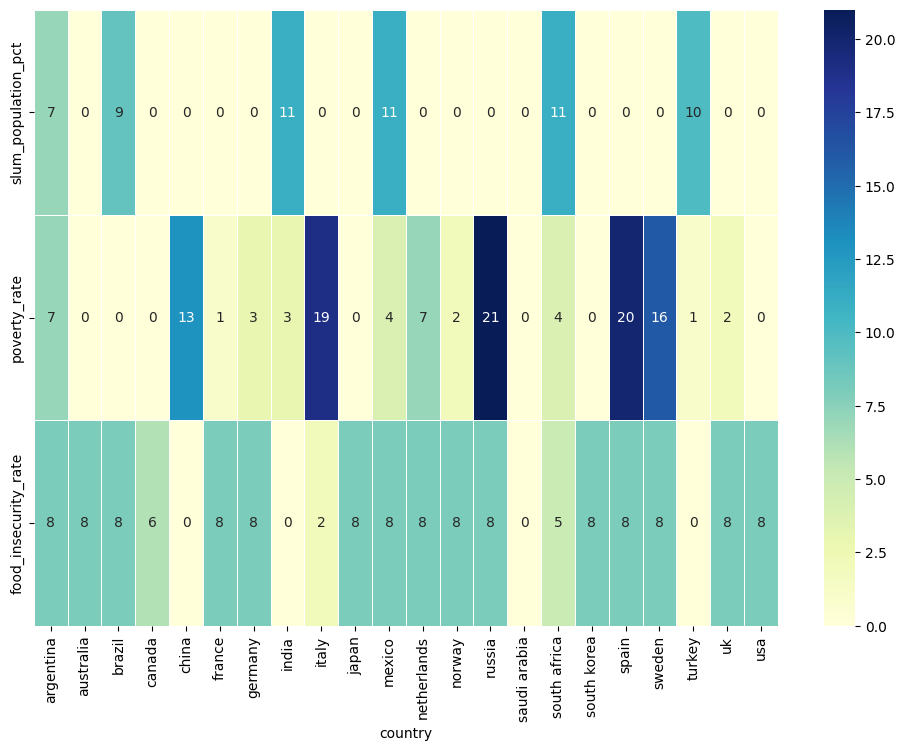

In [41]:
high_nulls_vars = ['slum_population_pct', 'poverty_rate', 'food_insecurity_rate']

coverage = df.groupby('country')[high_nulls_vars].apply(
    lambda x: x.notna().sum()
).unstack()

if isinstance(coverage, pd.Series):
    coverage = coverage.unstack()
elif coverage.shape[1] == 1:
    coverage = coverage.T

plt.figure(figsize=(12, 8))
sns.heatmap(
    coverage,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=.5
)
plt.show()

The chart below visualizes the availability of data for these same indicators across different countries and years.

- Green cells represent years where data is available.

- Gray cells indicate missing data for the respective year and country.

This visualization helps to quickly identify gaps in the dataset and understand the temporal coverage of each variable by country.

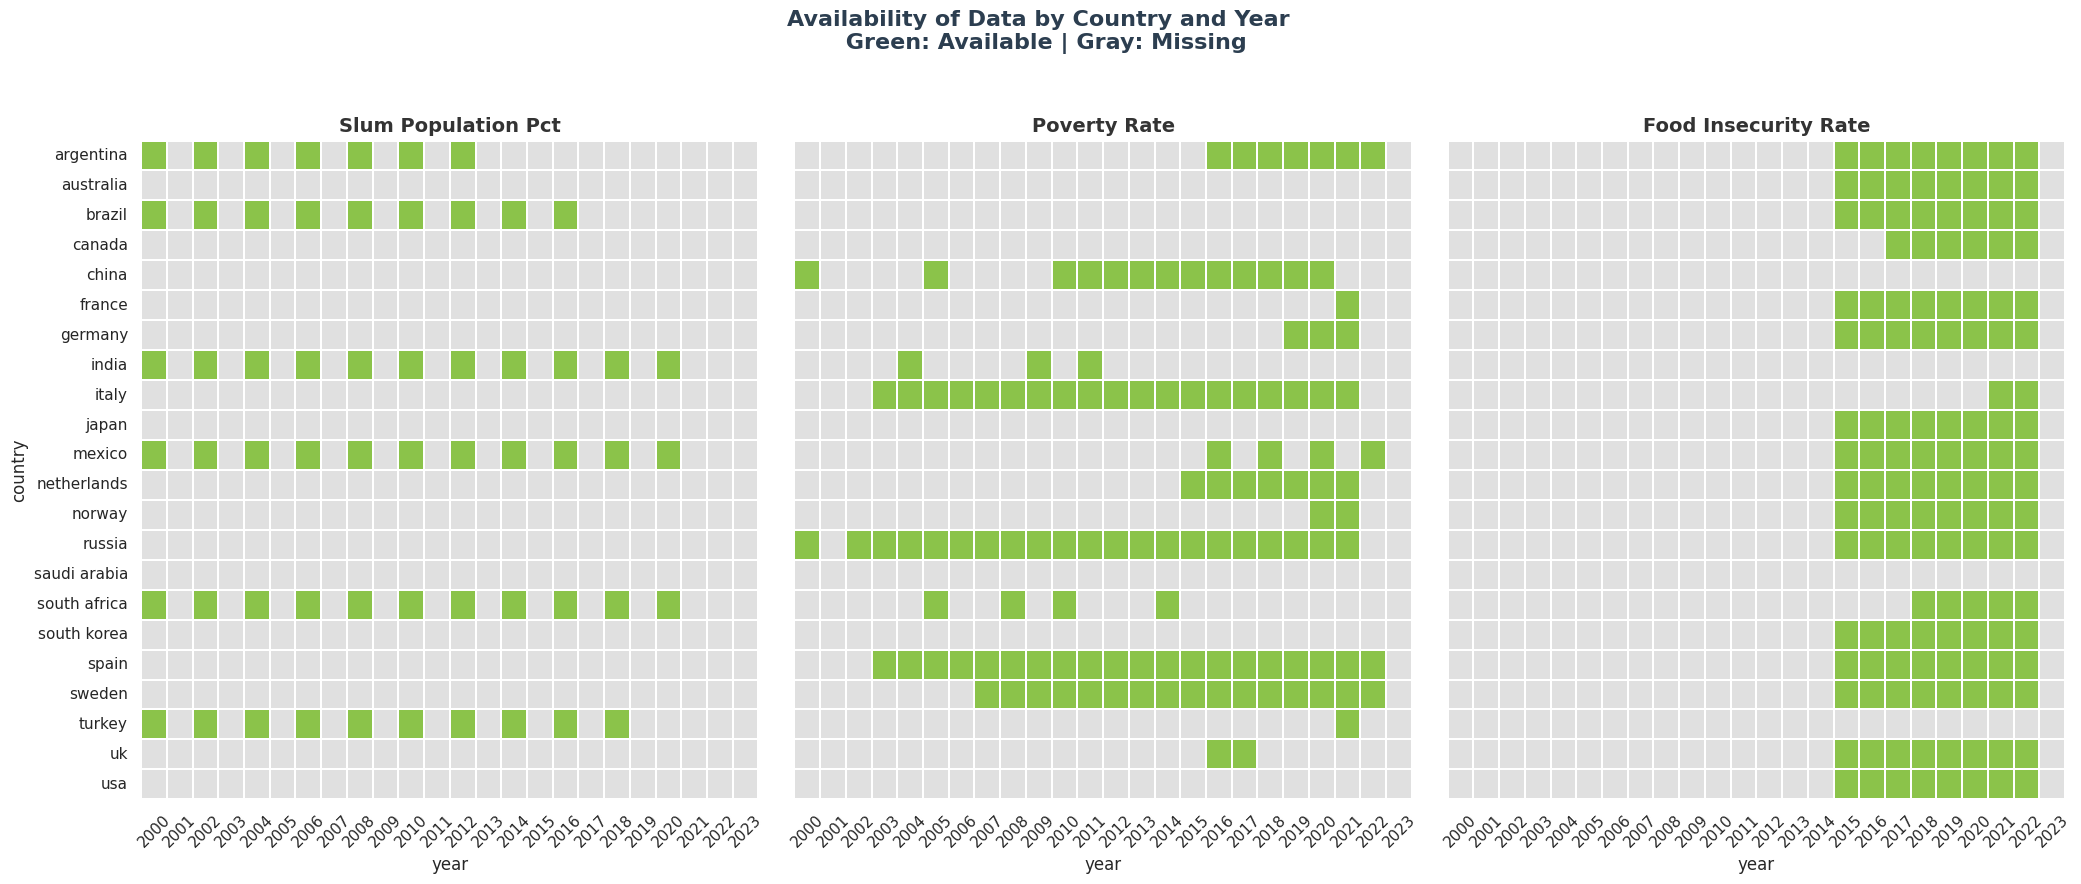

In [42]:
sns.set_theme(style="whitegrid") 

custom_cmap = sns.color_palette(["#e0e0e0", "#8bc34a"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 9), sharey=True)

for i, var in enumerate(high_nulls_vars):
    pivot_data = df.pivot(index='country', columns='year', values=var)

    sns.heatmap(
        pivot_data.notnull(),
        ax=axes[i],
        cmap=custom_cmap,
        cbar=False,
        linewidths=0.3,
        linecolor='white'
    )

    axes[i].set_title(
        var.replace('_', ' ').title(),
        fontsize=14,
        fontweight='bold',
        color='#333333'
    )
    axes[i].set_xlabel('year', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

    if i == 0:
        axes[i].set_ylabel('country', fontsize=12)
    else:
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='y', left=False)

plt.suptitle(
    'Availability of Data by Country and Year \n Green: Available | Gray: Missing',
    fontsize=16,
    fontweight='bold',
    color='#2c3e50'
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Notably, the `food_insecurity_rate` is only available from around 2014 onwards, whereas `slum_population_pct` and `poverty_rate` data are more sporadically available across countries and years.

After reviewing the distribution of missing data for these variables, it was decided to remove these columns from the dataset. This decision was made to avoid introducing bias or noise by imputing values where data availability is too inconsistent or sparse.

In [43]:
df = df.drop(columns=["slum_population_pct", "food_insecurity_rate", "poverty_rate"])
print("Variables discarded. Remaining columns:", df.columns.tolist())

Variables discarded. Remaining columns: ['country', 'year', 'co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct', 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']


👾 ***Imputation of null values that weren´t real zeros in `nuclear_energy_pct`***

Before imputating data we verify the distribution of the nuclear_energy_pct indicator, with a heatmap that allows the number of records of these variables to be displayed in each country.

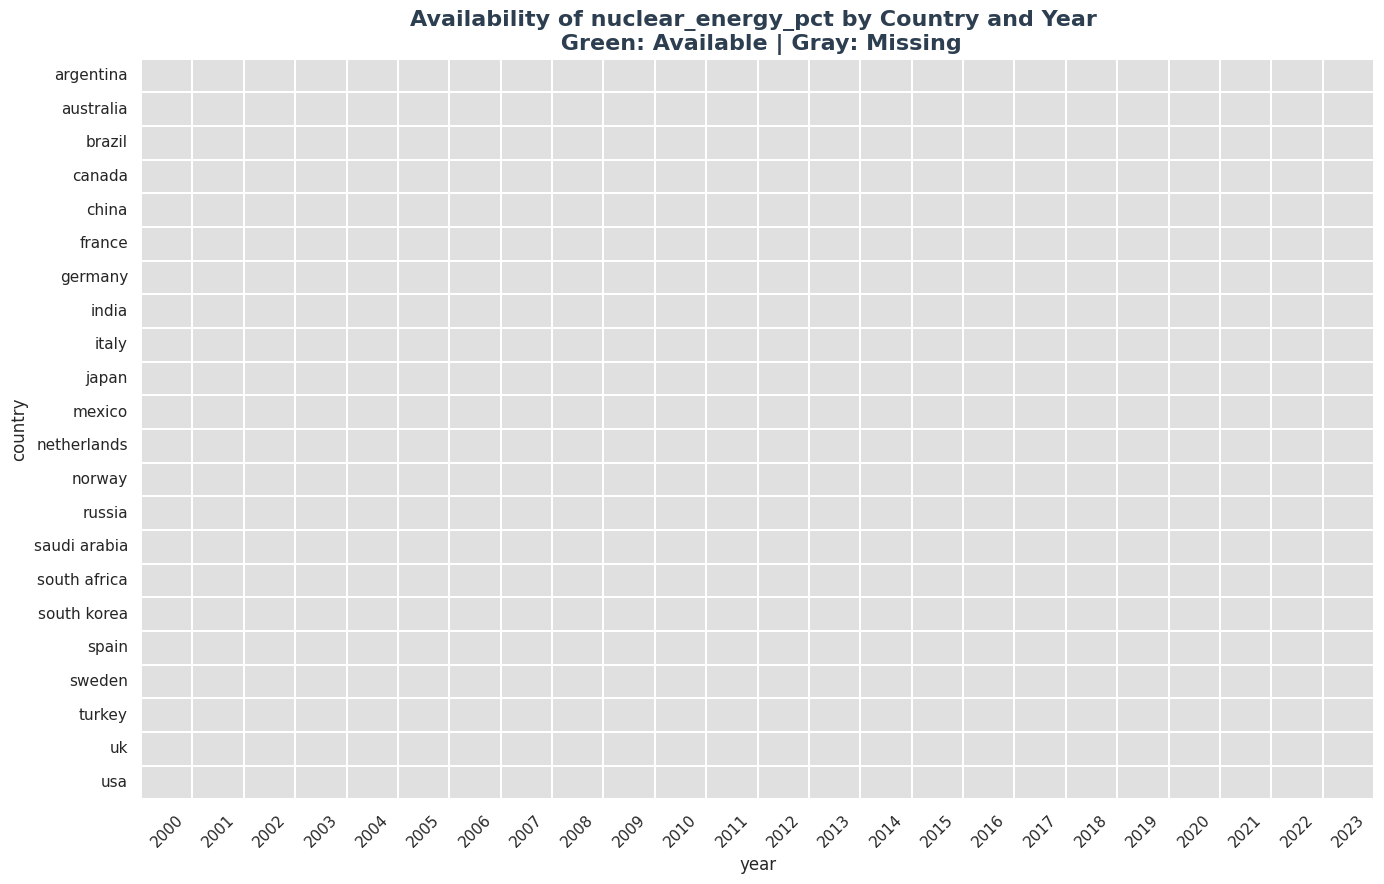

In [44]:
sns.set_theme(style="whitegrid")

coverage = df.pivot_table(
    index='country',
    columns='year',
    values='nuclear_energy_pct',
    aggfunc='count'
).notna().astype(int)

custom_cmap = sns.color_palette(["#e0e0e0", "#8bc34a"])

plt.figure(figsize=(14, 9))
sns.heatmap(
    coverage,
    cmap=custom_cmap,
    cbar=False,
    linewidths=0.3,
    linecolor='white'
)

plt.title('Availability of nuclear_energy_pct by Country and Year \n Green: Available | Gray: Missing',
          fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('year', fontsize=12)
plt.ylabel('country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



The plot revealed a consistent pattern of missing values, with most countries having relatively few gaps and a clear time-series structure.

Based on this visual assessment, we decided to impute missing values rather than drop the variable. The reasoning behind this was:

- The missing data was not randomly distributed but occurred in a manageable way across time.
- The time-series nature of the data made it suitable for interpolation techniques.

To address the missing values, the following steps were applied:
1. **Forward and Backward Fill:** To fill missing values at the start and end of the series.
2. **Linear Interpolation:** To estimate intermediate values using country-specific trends.
3. **Centered Rolling Mean:** Used as a final smoothing method to ensure consistency.


In [45]:
df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].ffill().bfill()

df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside')
)

df['nuclear_energy_pct'] = df.groupby('country')['nuclear_energy_pct'].transform(
    lambda x: x.fillna(x.rolling(3, min_periods=1, center=True).mean())
)

print(f"Nulos restantes: {df['nuclear_energy_pct'].isnull().sum()}")

Nulos restantes: 0


After this process, the number of missing values in `nuclear_energy_pct` was successfully reduced to zero. This strategy allowed us to retain the variable for analysis while maintaining a realistic and continuous data trend.

In [46]:
num_cols = ['co2_emissions_per_capita', 'nuclear_energy_pct', 'agri_employment_pct' , 'fertilizer_consumption', 'gdp_per_capita', 'pm25_pollution', 'undernourishment_rate', 'alcohol_consumption_liters']
summary = pd.DataFrame({
    'Variable': num_cols,
    'Nulos (%)': [round(df[col].isnull().mean()*100, 2) for col in num_cols],
    'Min': [df[col].min() for col in num_cols],
    'Max': [df[col].max() for col in num_cols],
    'Outliers (estimado)': [((df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) | 
                              (df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).sum()
                             for col in num_cols]
})

summary

,Variable,Nulos (%),Min,Max,Outliers (estimado)
0,co2_emissions_per_capita,0.0,0.938683,21.012618,0
1,nuclear_energy_pct,0.0,0.000000,79.511660,26
2,agri_employment_pct,0.0,0.570907,59.644730,47
3,fertilizer_consumption,0.0,5.049011,7180.738745,16
4,gdp_per_capita,0.0,442.750219,108798.451166,6
5,pm25_pollution,0.0,5.636708,79.037396,69
6,undernourishment_rate,0.0,2.500000,22.000000,64
7,alcohol_consumption_liters,0.0,0.000000,14.650000,24


🚨 ***Outlier preliminar detection***

The summary table of all variables shows that while there are no missing values across the dataset anymore, several indicators contain a significant number of potential outliers (e.g., pm25_pollution, undernourishment_rate, agri_employment_pct, etc.).

The outliers will be kept since they may reflect real-world extremes (e.g., highly polluted regions or low-income countries), removing them could eliminate important information.

#### ***Validating outliers***

🔎 ***Outlier Validation***

Before applying any outlier removal or transformation, it is important to assess whether the extreme values observed in the dataset are actually implausible or simply reflect valid but uncommon conditions. In this section, we focus on validating whether the values found in different indicators fall within realistic ranges or could be attributed to exceptional yet possible scenarios.

We do not aim to remove or modify these values at this stage, but rather to:

- Understand the nature and distribution of potential outliers.

- Visually inspect their plausibility using boxplots and descriptive statistics.

- Identify if any values are clearly erroneous or beyond feasible boundaries.

This analysis ensures that no meaningful information is discarded, especially in variables where extreme values might correspond to real-world phenomena such as very high pollution levels, income inequality, or agricultural dependence.

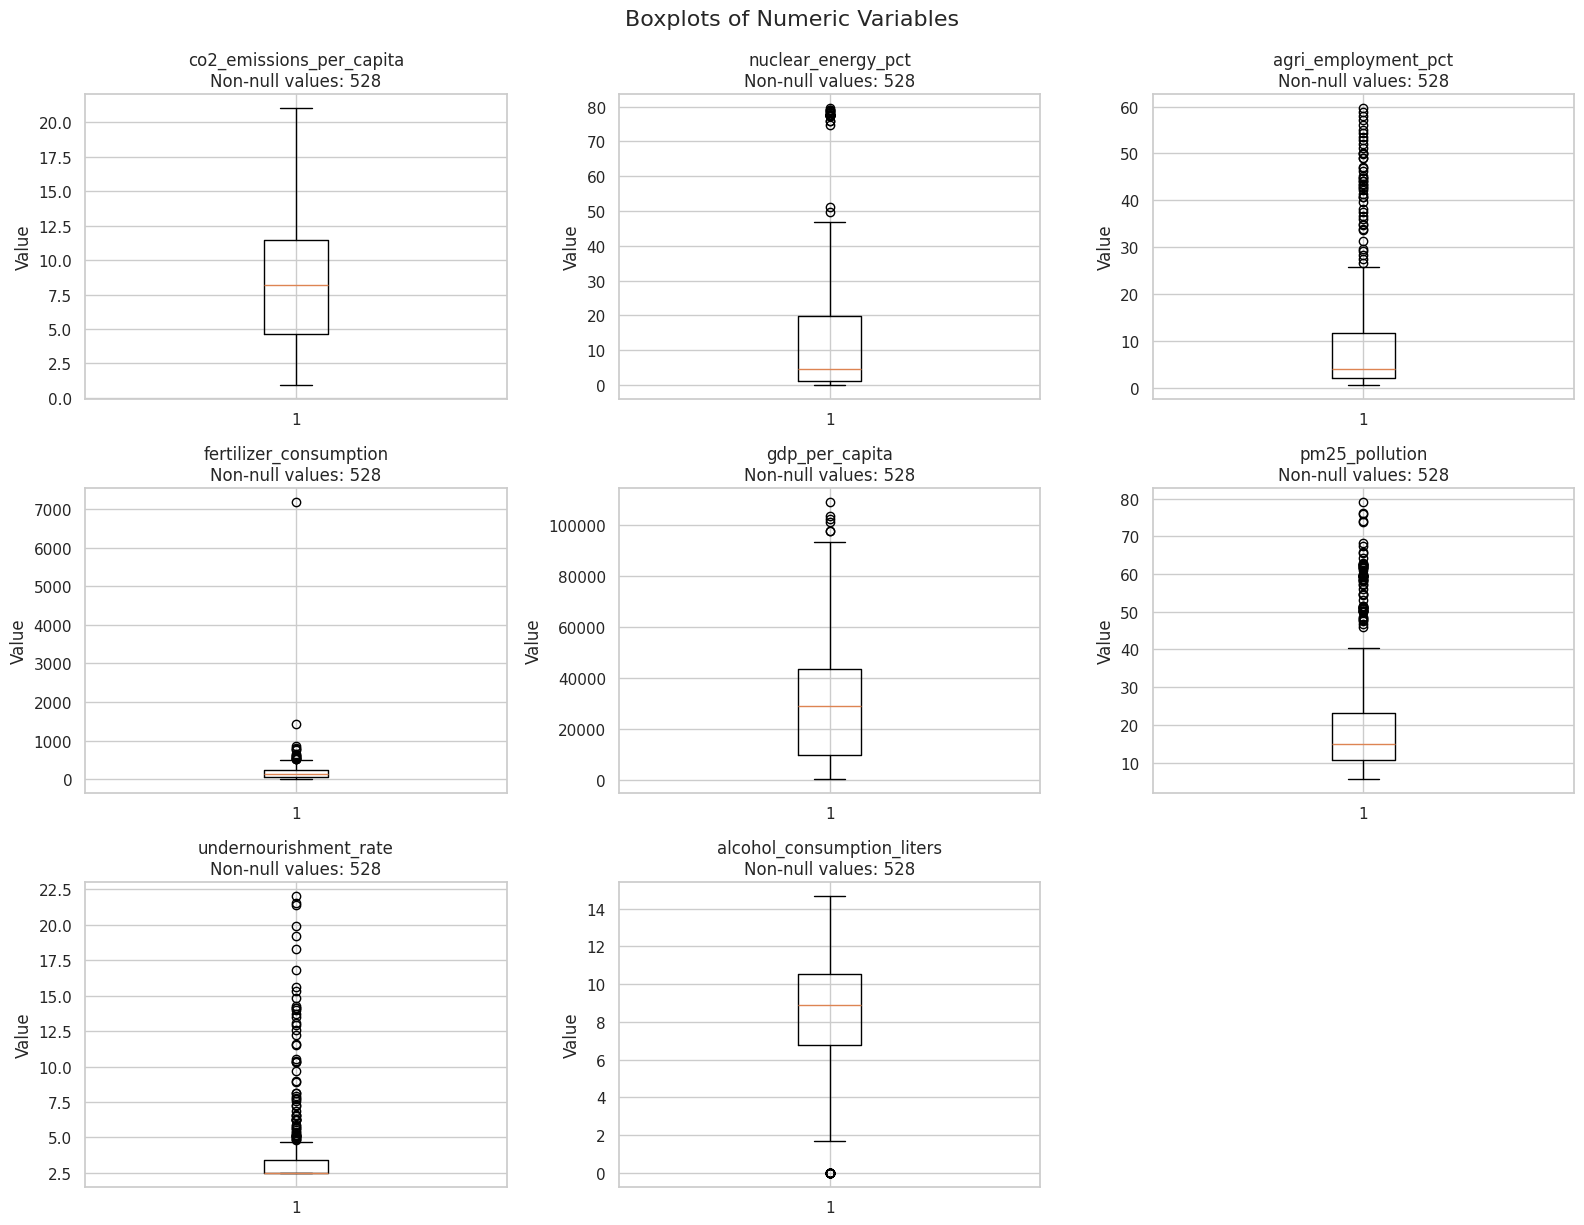

/tmp/ipykernel_13541/3226389439.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extremes = pd.concat([extremes, pd.DataFrame({


,Indicator,Min,Max
0,co2_emissions_per_capita,0.938683,21.012618
0,nuclear_energy_pct,0.000000,79.511660
0,agri_employment_pct,0.570907,59.644730
0,fertilizer_consumption,5.049011,7180.738745
0,gdp_per_capita,442.750219,108798.451166
0,pm25_pollution,5.636708,79.037396
0,undernourishment_rate,2.500000,22.000000
0,alcohol_consumption_liters,0.000000,14.650000


In [47]:
indicators = [
    'co2_emissions_per_capita',
    'nuclear_energy_pct',
    'agri_employment_pct',
    'fertilizer_consumption',
    'gdp_per_capita',
    'pm25_pollution',
    'undernourishment_rate',
    'alcohol_consumption_liters'
]

n_cols = 3
n_rows = (len(indicators) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(indicators):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}\nNon-null values: {df[col].count()}')
    axes[i].set_ylabel('Value')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Numeric Variables', fontsize=16, y=1.02)
plt.show()

extremes = pd.DataFrame(columns=['Indicator', 'Min', 'Max'])
for col in indicators:
    extremes = pd.concat([extremes, pd.DataFrame({
        'Indicator': [col],
        'Min': [df[col].min()],
        'Max': [df[col].max()]
    })])

display(extremes)


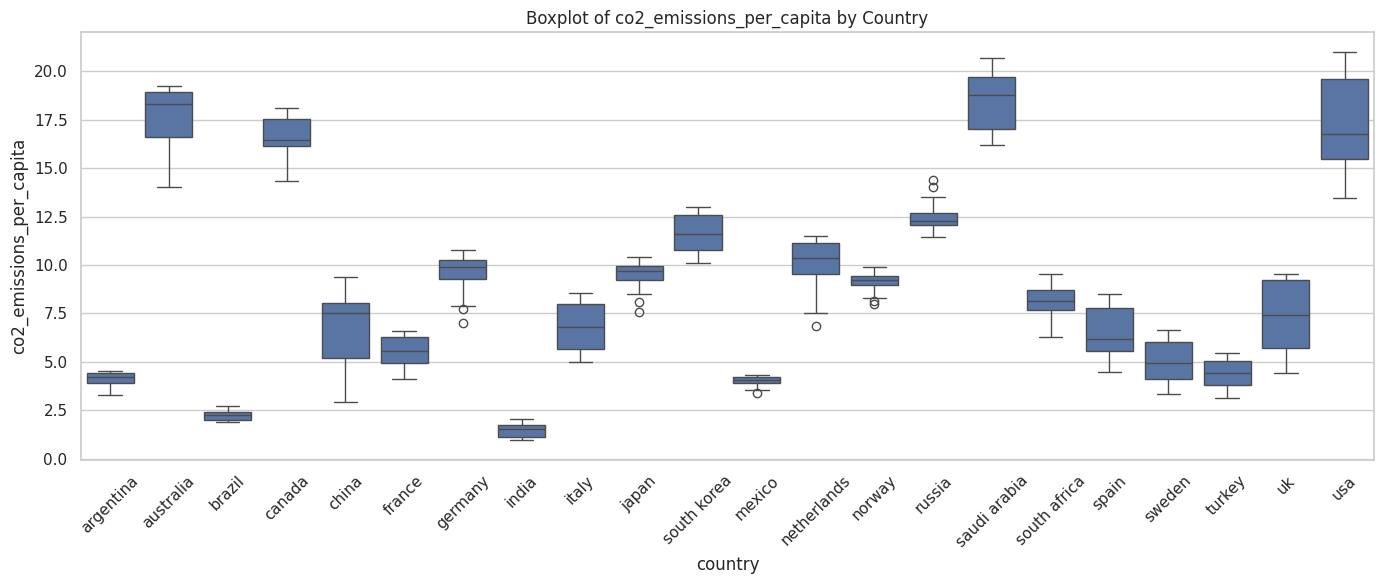

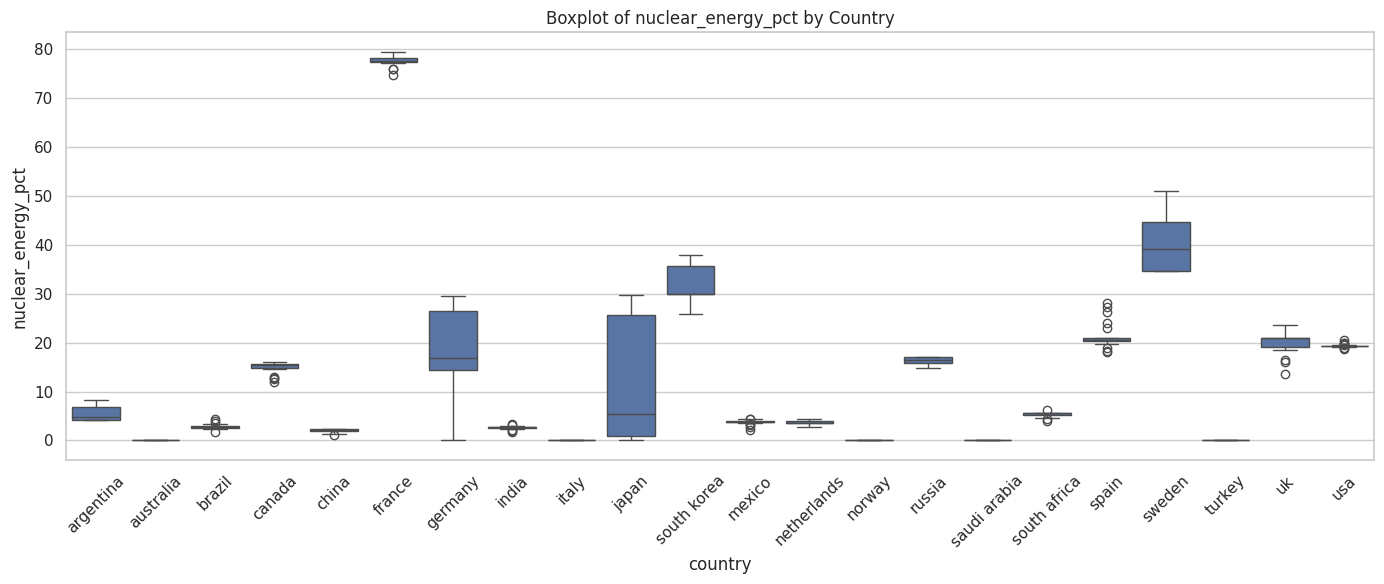

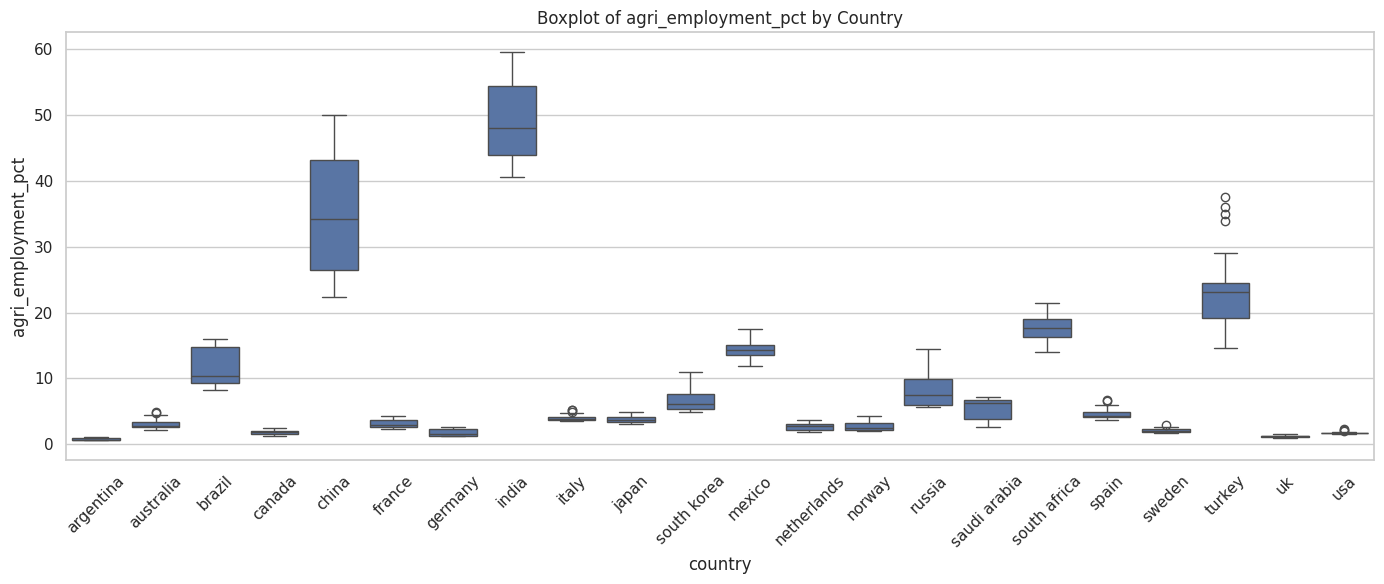

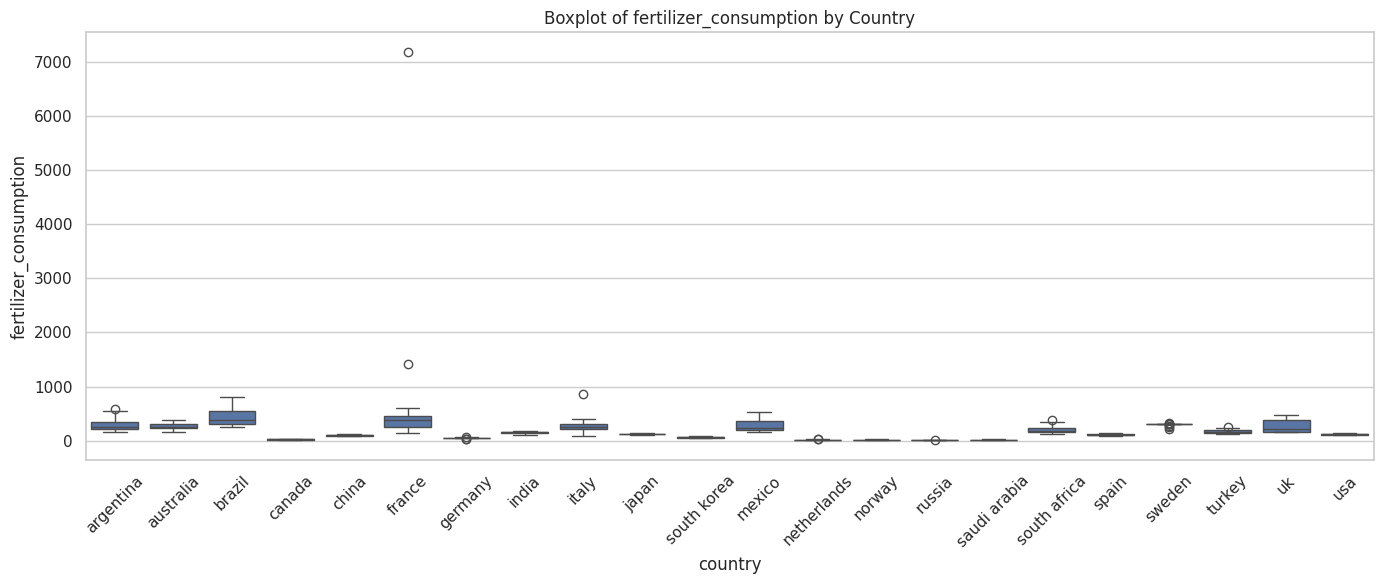

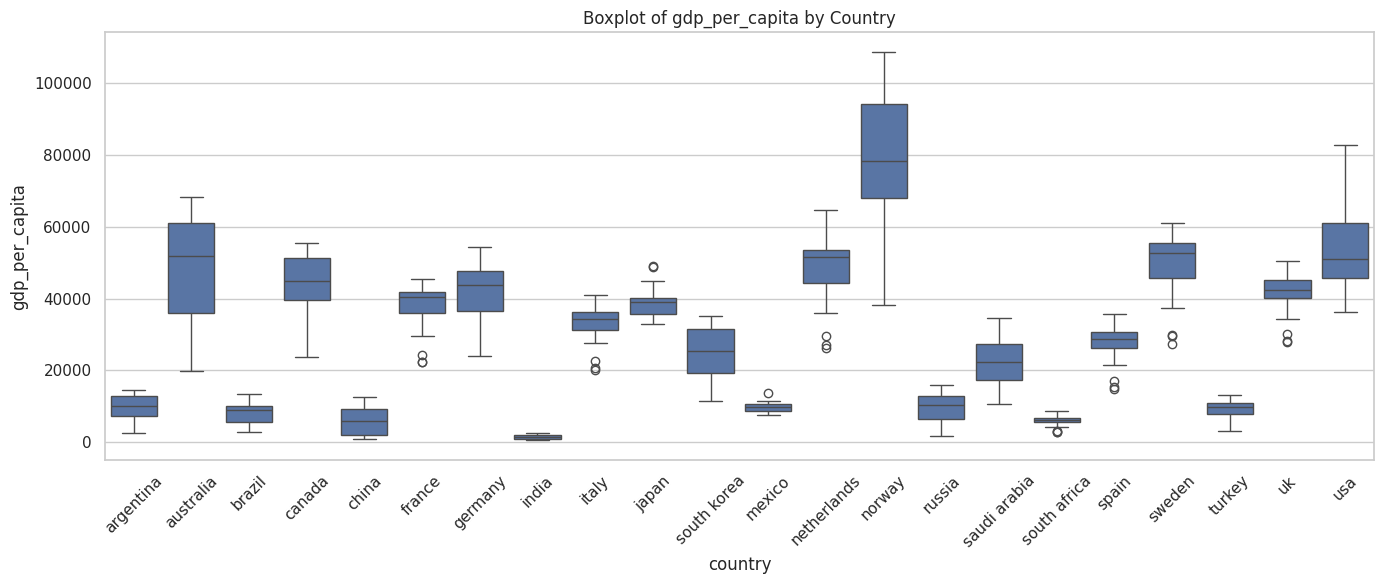

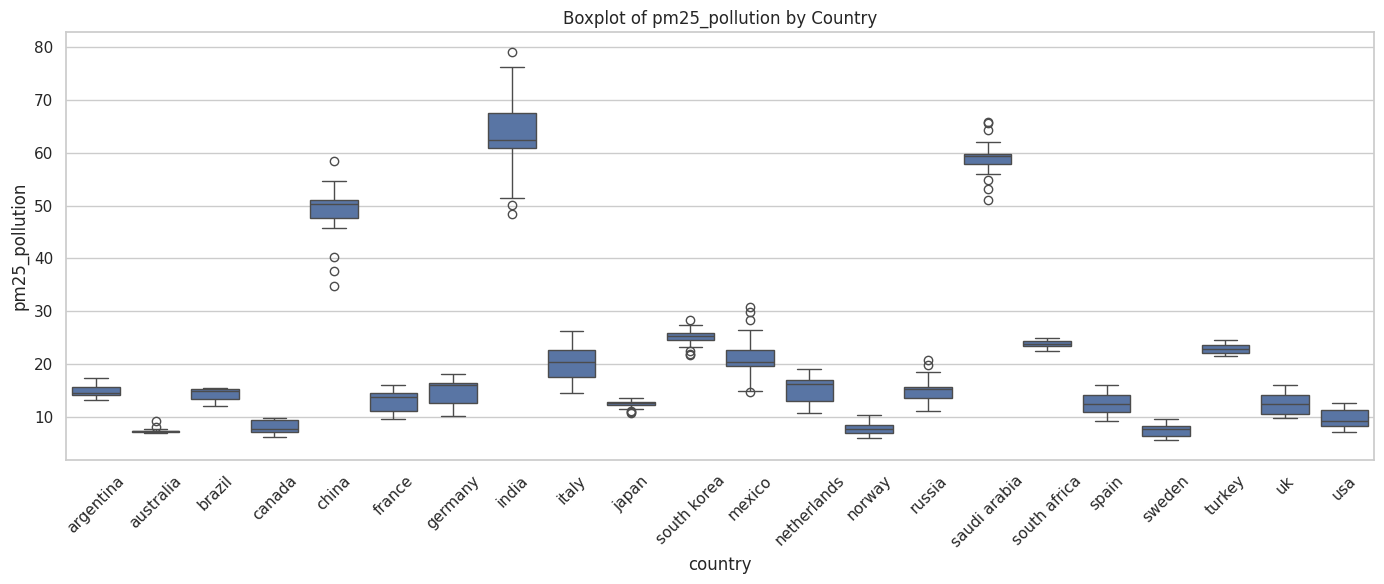

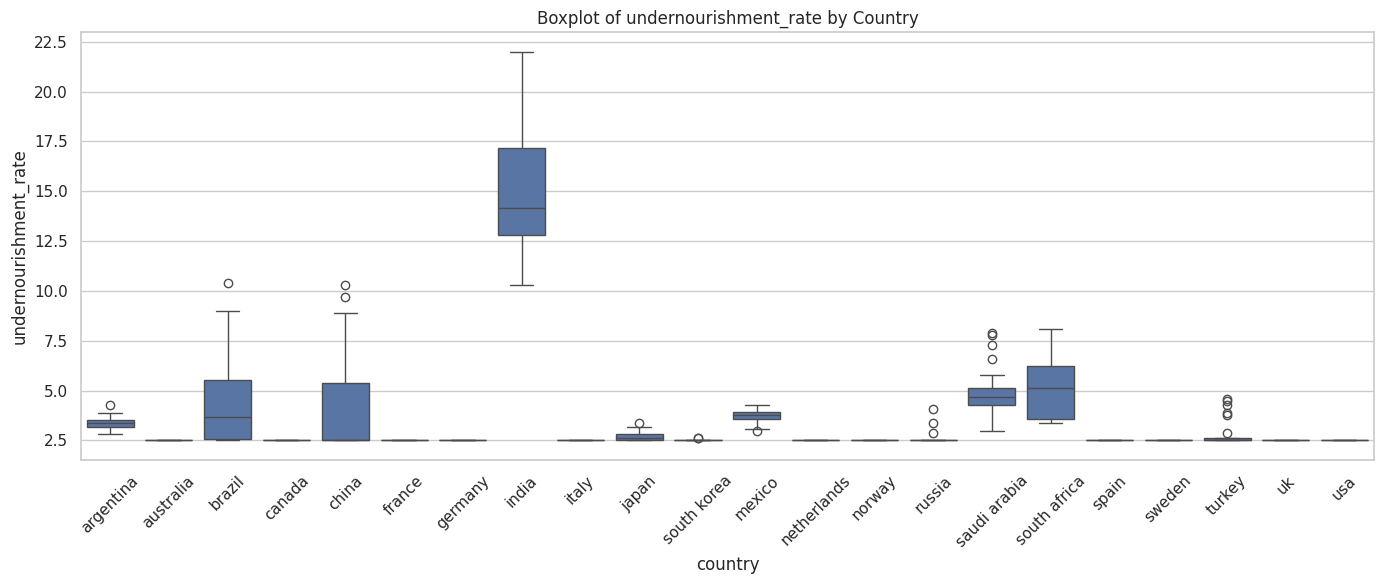

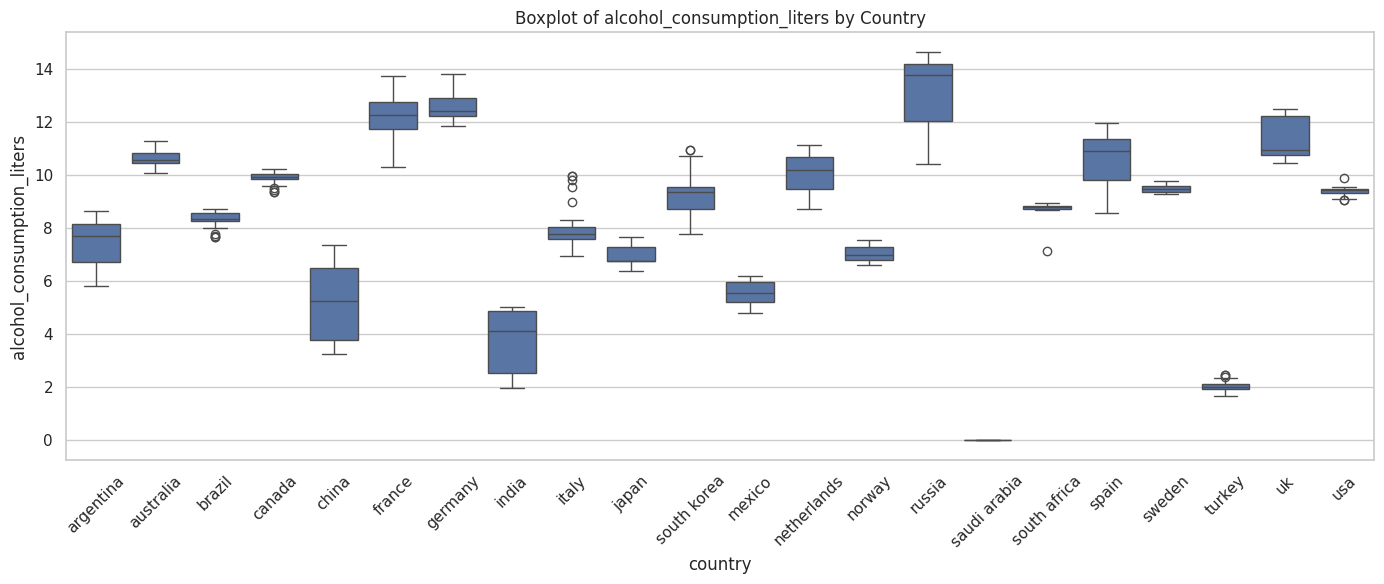

In [48]:
for col in indicators:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x='country', y=col)
    plt.title(f'Boxplot of {col} by Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

🌱 ***Treatment of Outliers in Fertilizer Consumption (France)***

During the exploratory data analysis, two significant outliers were identified in the `fertilizer_consumption` values for France. These data points were far above the typical range observed for that country and the rest of the dataset, with one exceeding 7,000 kg per hectare, which is extremely unusual in comparison to other nations and France’s historical values.

After reviewing the context and distribution of these values, we decided to remove them based on the following reasons:

- These extreme values disproportionately skewed the distribution, making it harder to interpret central tendencies and variability across countries.
- While outliers were retained globally to preserve natural variability between countries, this localized removal is justified because the outliers in France appear to be data anomalies rather than true extreme cases.

Therefore, the two extreme `fertilizer_consumption` values for France were excluded from further analysis to ensure a more accurate and interpretable representation of the data.


In [49]:
Q1 = df[df['country'] == 'france']['fertilizer_consumption'].quantile(0.25)
Q3 = df[df['country'] == 'france']['fertilizer_consumption'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['country'] == 'france') & (df['fertilizer_consumption'] > upper_bound))]


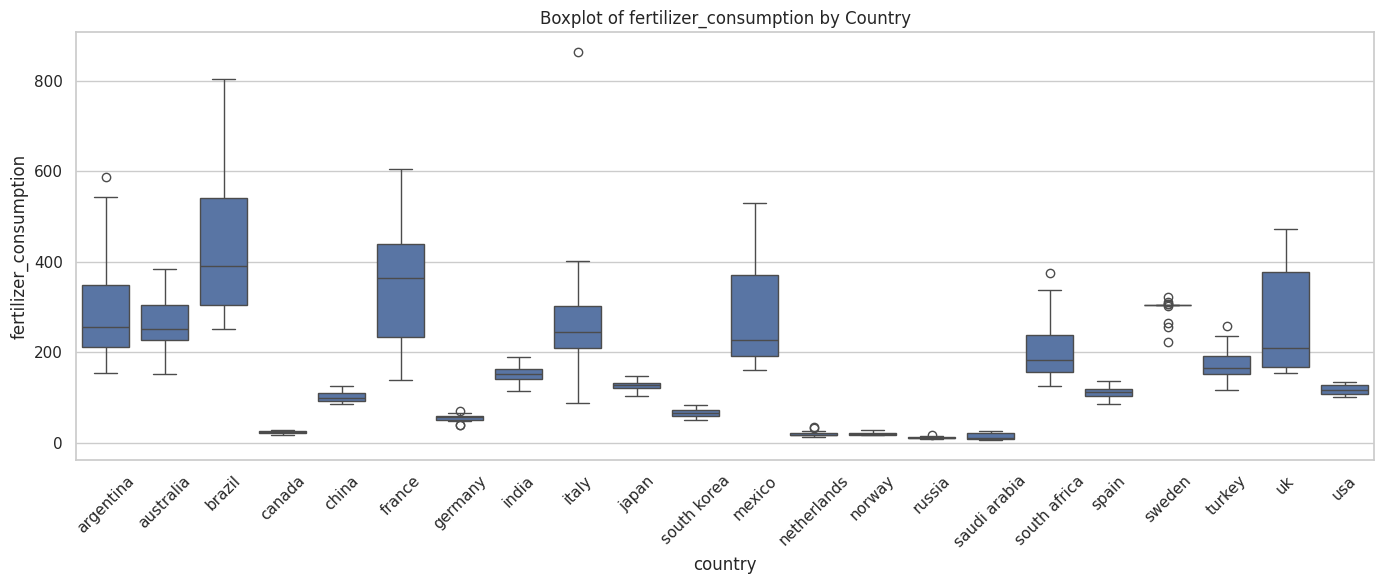

In [50]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='country', y='fertilizer_consumption')
plt.title(f'Boxplot of fertilizer_consumption by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

💭 ***Outlier Treatment in Indicators***

During the exploratory data analysis, the presence of outliers was observed in several indicators, particularly in variables like `fertilizer_consumption`, `gdp_per_capita`, and `undernourishment_rate`. However, we decided **not to remove these outliers** (except for the ones in `fertilizer_consumption`), based on the following considerations:

1. Representation of Real-World Phenomena

The identified outliers reflect **actual differences between countries** rather than data entry or processing errors. For example, some countries have extremely high fertilizer consumption due to intensive agricultural practices or specific policy decisions.

2. Preservation of Global Diversity

Removing outliers would eliminate **important variability** that characterizes the global dataset. These values provide insight into the economic, environmental, and social disparities between nations and thus were kept to ensure a more accurate and holistic analysis.

Next, we examine the availability of `fertilizer_consumption` data by country and year through the following plot.

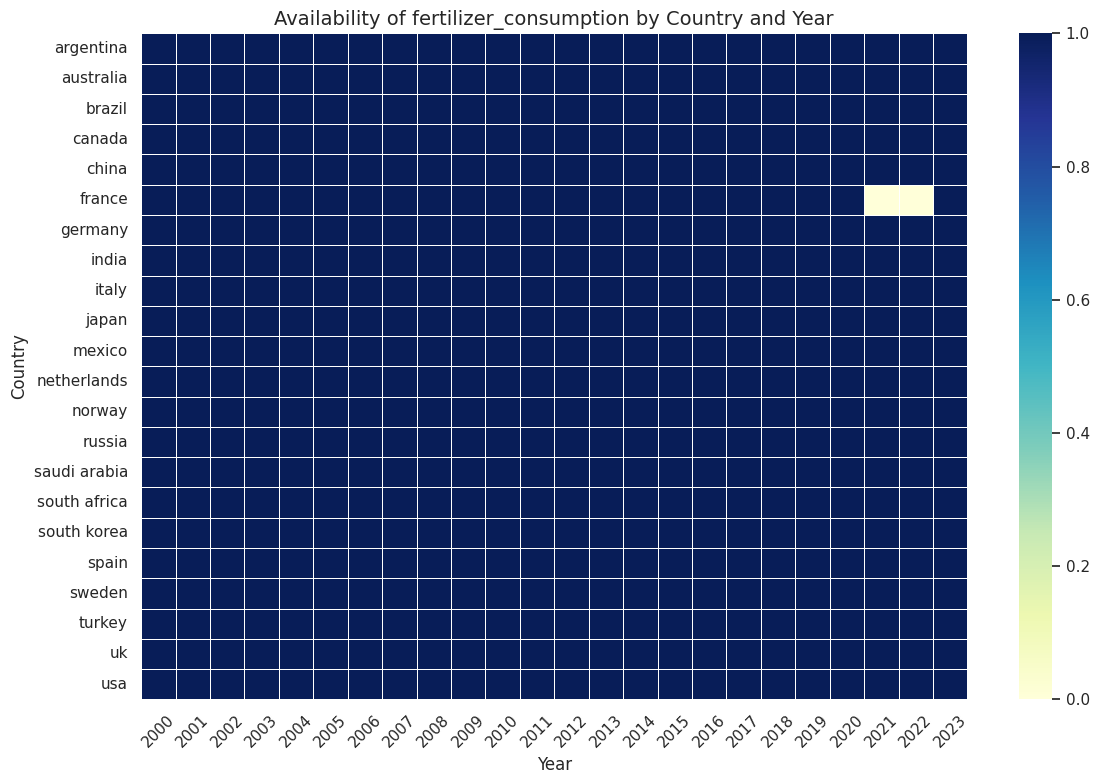

In [51]:
pivot_data = df.pivot_table(
    index='country',
    columns='year',
    values='fertilizer_consumption',
    aggfunc='count'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_data.notna(),
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,
    linecolor='white'
)
plt.title('Availability of fertilizer_consumption by Country and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### ***Verifying general distributions and intial correlations between indicators***

In this section, we explore the general distribution of the main indicators included in the dataset, aiming to identify their overall behavior and potential patterns. By visualizing the distributions, we can detect skewness, possible normalization needs, and assess the comparability between indicators.

Additionally, we perform a preliminary correlation analysis to identify potential relationships between variables. This helps uncover which indicators might be linked and could influence each other, guiding further modeling or analytical decisions. Detecting strong correlations early on is especially useful for feature selection, understanding multicollinearity, or identifying indicators that may serve as proxies for one another.

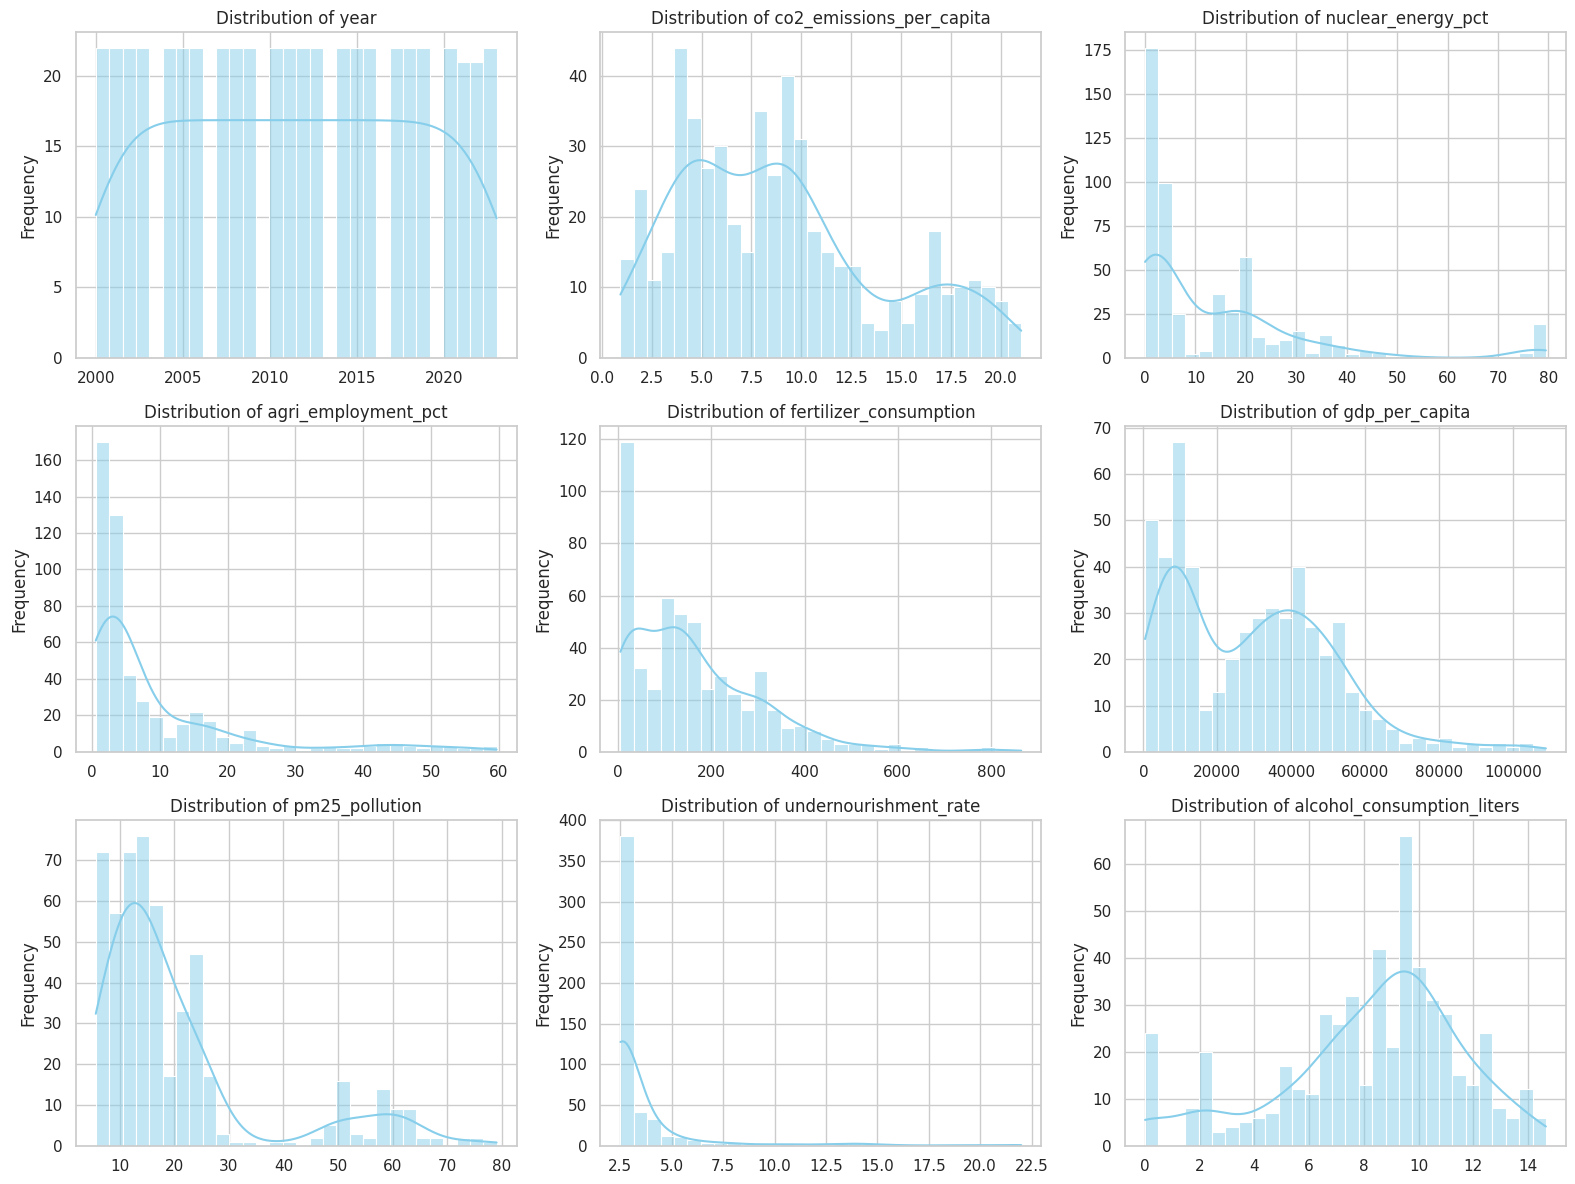

In [52]:
indicator_columns = df.select_dtypes(include='number').columns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

for i, col in enumerate(indicator_columns[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

📌 Conclusion on Indicator Distributions
The distributions of the main indicators reveal a variety of patterns, including skewness, multimodality, and outliers:

- Most variables (e.g., agri_employment_pct, fertilizer_consumption, undernourishment_rate) are right-skewed, suggesting that a majority of countries have lower values with a few extreme high values.

- gdp_per_capita and co2_emissions_per_capita show multimodal patterns, potentially indicating distinct clusters of countries based on economic development or industrialization levels.

- The variable year is uniformly distributed, which is expected given consistent yearly data collection.

- Several indicators exhibit long tails or outliers, especially in variables like fertilizer_consumption and nuclear_energy_pct, which should be considered in later preprocessing or modeling steps.

These initial insights help understand the range, concentration, and potential anomalies in the data, guiding further steps like transformation, normalization, or outlier handling if needed.

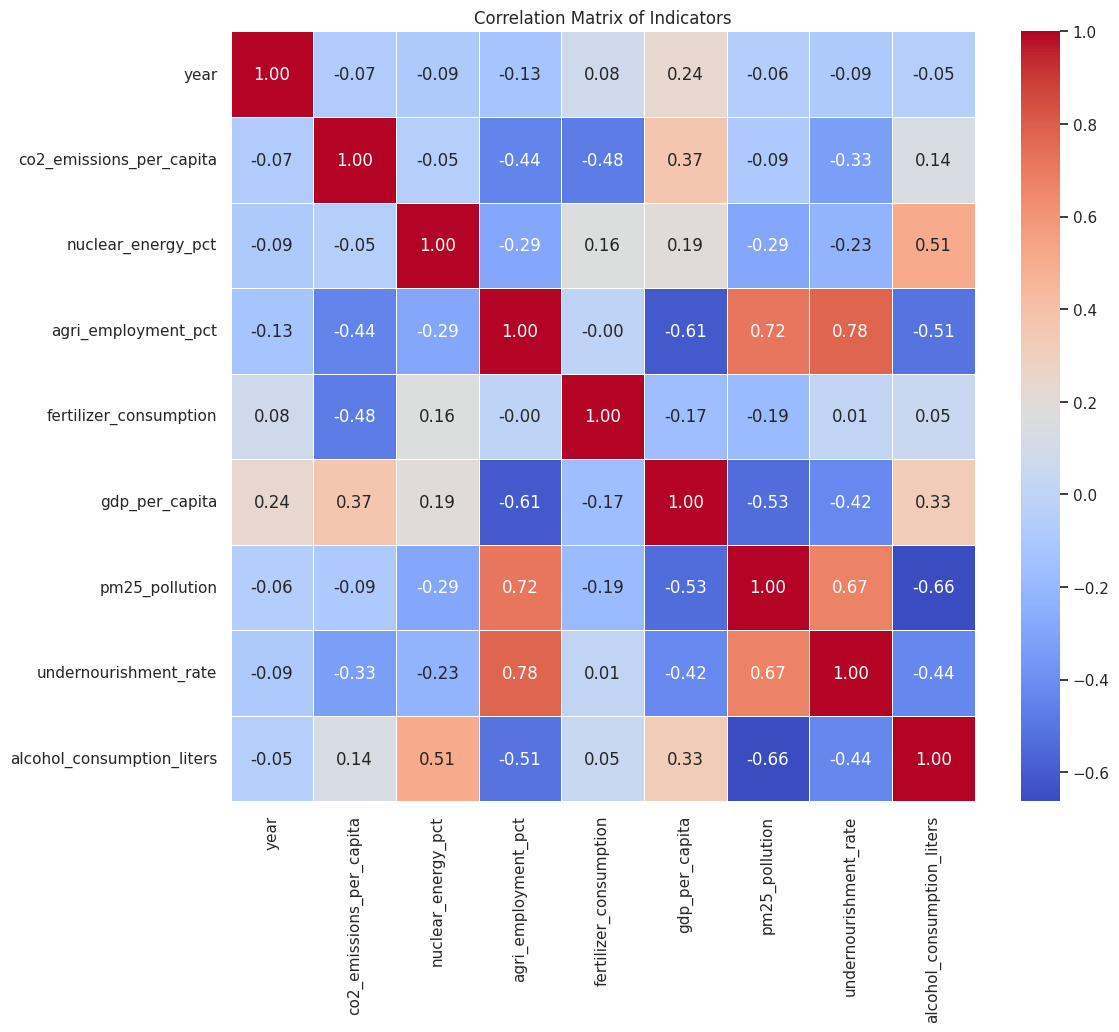

In [53]:
corr = df[indicator_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Indicators')
plt.show()


In [54]:
df.head()

,country,year,co2_emissions_per_capita,nuclear_energy_pct,agri_employment_pct,fertilizer_consumption,gdp_per_capita,pm25_pollution,undernourishment_rate,alcohol_consumption_liters
168,argentina,2000,3.675006,6.947475,1.082816,587.063265,7637.014892,17.426036,3.4,6.73
169,argentina,2001,3.490969,7.833324,1.065900,198.936303,7141.475077,17.183874,2.9,6.73
170,argentina,2002,3.262086,6.892591,1.061939,160.851251,2569.699635,16.923514,3.7,6.17
171,argentina,2003,3.519761,8.221232,1.021523,197.584495,3320.477751,16.643572,4.3,5.84
172,argentina,2004,3.857510,7.856038,0.969933,222.144902,4242.020991,16.342663,3.9,5.95


📌 Correlation Matrix Insights
The correlation matrix reveals several meaningful relationships between key indicators:

- Agricultural employment shows a strong negative correlation with GDP per capita (-0.61) and a strong positive correlation with undernourishment rate (0.78) and PM2.5 pollution (0.72). This may reflect structural inequalities in less developed economies.

- Undernourishment rate also correlates negatively with alcohol consumption (-0.44), GDP per capita (-0.43), and positively with PM2.5 pollution (0.67), indicating possible links between poverty, malnutrition, and environmental conditions.

- Nuclear energy usage has a moderate positive correlation with alcohol consumption (0.51) and GDP per capita (0.20), and a weak negative correlation with agricultural employment (-0.29), suggesting it is more prevalent in developed nations.

- Fertilizer consumption is positively correlated with nuclear energy and GDP per capita, and negatively correlated with CO2 emissions, possibly indicating more efficient agricultural practices in wealthier countries.

- CO2 emissions per capita and GDP per capita show a moderate positive relationship (0.37), consistent with industrialization effects.

These patterns help identify clusters of development, inequality, and pollution, which may inform future multivariate analyses or feature selection for predictive modeling.

### ***Conclusions***

The analysis made it possible to prepare a complex dataset, applying appropriate imputations according to the context and the nature of missing values. Strategic decisions were made to preserve valuable information and avoid distortions, prioritizing the quality and consistency of the dataset.

Outliers were detected in several indicators, but most of them were retained as they represented real and relevant conditions between countries. Only specific cases were removed where these outliers affected the analysis.

The distributions revealed significant patterns such as biases toward low values and the presence of groups of countries with similar characteristics. This suggests marked differences in development, environmental and social conditions.

Correlations between indicators showed clear relationships between poverty, undernutrition, pollution and economic status, which helps to understand global dynamics and structural inequalities.